In [7]:
import numpy as np
import pandas as pd
import torch

In [4]:
df = pd.read_csv('weather_prediction_dataset.csv')

df.head()

,DATE,MONTH,BUDAPEST_temp_max,DE_BILT_temp_max,DRESDEN_temp_max
0,20000101,1,-0.7,8.1,2.0
1,20000102,1,-1.9,8.7,4.0
2,20000103,1,1.1,9.6,5.1
3,20000104,1,0.1,9.4,5.2
4,20000105,1,3.9,7.4,6.9


## Display 1 year

In [46]:
year_2k_df = df[:365][['MONTH', 'DE_BILT_temp_max' ]]
mean_temp_df = year_2k_df.groupby('MONTH').mean()
mean_temp_df

,DE_BILT_temp_max
MONTH,
1,6.561290
2,8.941379
3,10.112903
4,14.753333
5,20.022581
6,21.073333
7,19.548387
8,22.809677
9,19.946667


<Axes: xlabel='MONTH'>

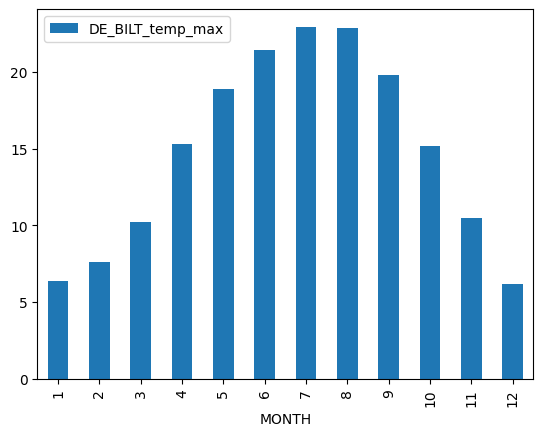

In [44]:
import matplotlib.pyplot as plt
mean_temp_df.plot(kind='bar')

<Axes: >

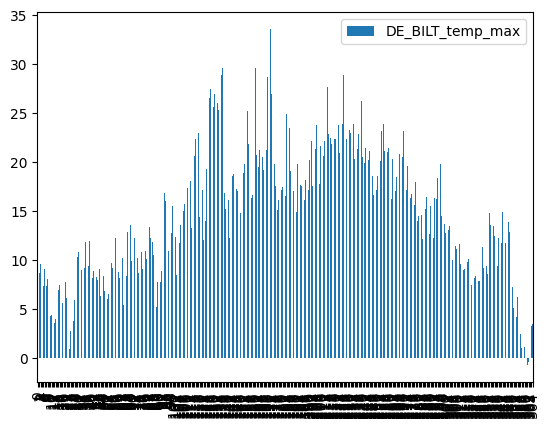

In [47]:
year_2k_df[['DE_BILT_temp_max']].plot(kind='bar')

In [48]:
year_2k_df

,MONTH,DE_BILT_temp_max
0,1,8.1
1,1,8.7
2,1,9.6
3,1,9.4
4,1,7.4
...,...,...
360,12,-0.7
361,12,-0.4
362,12,2.7
363,12,3.3


In [58]:
year_2k_df['DE_BILT_temp_max'].shift(-4).to_frame()

,DE_BILT_temp_max
0,7.4
1,9.1
2,7.4
3,8.1
4,7.0
...,...
360,3.5
361,NaN
362,NaN
363,NaN


In [59]:
df[['DE_BILT_temp_max' ]]

,DE_BILT_temp_max
0,8.1
1,8.7
2,9.6
3,9.4
4,7.4
...,...
3649,7.3
3650,1.7
3651,0.9
3652,0.5


## Input and Output data

In [5]:
x_df = df[['DE_BILT_temp_max' ]]
y_df=df['DE_BILT_temp_max'].shift(-4).to_frame().dropna()
# x_df=x_df[:len(y_df)].to_numpy()
# y_df=y_df.to_numpy()
x_df=[i[0] for i in x_df.values]
# y_arr=[]

In [154]:
# input_size=5
# sequences=[]
# for i in range(len(x_df) - input_size-1):
#     sequence = x_df[i:i+input_size]
#     sequences.append(sequence)

In [8]:
x_tensor=torch.tensor(np.array(x_df), dtype=torch.float64)
# y_tensor=torch.tensor(np.array(y_arr))
x_tensor

tensor([8.1000, 8.7000, 9.6000,  ..., 0.9000, 0.5000, 0.7000],
       dtype=torch.float64)

In [162]:
x_tensor[0].unsqueeze(0).unsqueeze(1).size()

torch.Size([1, 1, 5])

## Define Network

In [59]:
import torch
from torch import nn
import torch.optim as optim
import numpy as np

In [94]:
class WeatherForecastRNN(nn.Module):
    def __init__(self, input_size, hidden_dim, num_layers, output_size):
        super(WeatherForecastRNN, self).__init__()

        self.hidden_dim = hidden_dim

        self.rnn = nn.RNN(input_size, hidden_dim,  num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        x, hidden = self.rnn(x, hidden)
        x = x.view(-1, self.hidden_dim )

        x = self.fc(x)

        return x, hidden

### Explore RNN

In [98]:
input_size=1
hidden_dim=10
num_layers=2
output_size=1

test_rnn = WeatherForecastRNN(input_size, hidden_dim, num_layers, output_size)
test_rnn

WeatherForecastRNN(
  (rnn): RNN(1, 10, num_layers=2, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)

In [60]:
criterion = nn.MSELoss()
optimizer = optim.Adam(test_rnn.parameters(), lr=0.01)

In [53]:
x_df

[8.1,
 8.7,
 9.6,
 9.4,
 7.4,
 9.1,
 7.4,
 8.1,
 7.0,
 4.3,
 4.4,
 2.6,
 3.6,
 4.0,
 5.4,
 6.9,
 7.5,
 8.6,
 5.6,
 6.1,
 7.8,
 6.1,
 4.4,
 0.9,
 2.8,
 5.5,
 3.8,
 5.9,
 11.3,
 10.3,
 10.8,
 10.2,
 9.0,
 9.1,
 9.2,
 11.8,
 8.9,
 9.4,
 11.9,
 8.5,
 8.2,
 8.9,
 6.9,
 8.3,
 8.0,
 9.1,
 6.3,
 7.9,
 8.4,
 6.8,
 7.8,
 6.0,
 6.5,
 10.0,
 9.7,
 9.2,
 9.5,
 12.3,
 12.7,
 8.8,
 8.2,
 8.2,
 10.2,
 5.4,
 7.5,
 8.4,
 12.9,
 12.9,
 13.6,
 9.9,
 11.6,
 12.3,
 10.3,
 10.2,
 8.7,
 10.4,
 10.8,
 9.1,
 10.4,
 10.9,
 10.1,
 15.8,
 13.4,
 12.3,
 11.8,
 10.5,
 9.1,
 5.2,
 7.8,
 7.8,
 7.8,
 8.9,
 14.3,
 16.8,
 16.0,
 7.7,
 10.9,
 13.1,
 12.8,
 15.5,
 10.4,
 12.4,
 8.5,
 9.2,
 11.7,
 13.6,
 13.3,
 15.0,
 15.7,
 18.0,
 17.4,
 18.2,
 18.1,
 13.3,
 17.0,
 20.6,
 22.4,
 19.5,
 23.0,
 14.4,
 14.9,
 17.1,
 12.0,
 14.0,
 19.3,
 25.3,
 26.5,
 27.5,
 25.7,
 25.6,
 27.0,
 25.1,
 26.0,
 25.3,
 27.1,
 28.9,
 29.6,
 16.8,
 15.2,
 13.6,
 16.1,
 12.3,
 15.7,
 18.6,
 18.8,
 15.3,
 17.3,
 17.0,
 13.3,
 14.8,
 15.0,
 18.9,
 19.

In [92]:
test_data.size()

torch.Size([1, 5, 5])

In [101]:
test_df = np.array(x_df[:2])
test_df.resize((2,1))
test_data = torch.Tensor(test_df).unsqueeze(0)

pred, hid= test_rnn(test_data, None)

print(f'Input size {test_data.size()}')
print(f'Hidden size {hid.size()}')
print(f'Output size {pred.size()}')

Input size torch.Size([1, 2, 1])
Hidden size torch.Size([2, 1, 10])
Output size torch.Size([2, 1])


## Train the model

In [105]:
input_size = 2

def train(model, print_every):
    hidden = None

    for i in range(300-input_size):
        input_df = np.array(x_df[i:i+input_size])
        input_df.resize((input_size,1))
        input_df = torch.Tensor(input_df).unsqueeze(0)

        output_df =  np.array(x_df[i+input_size:i+2*input_size])
        output_df.resize((input_size,1))
        output_df = torch.Tensor(output_df).unsqueeze(0)

        r_out, hidden= model(test_data, hidden)
        hidden = hidden.data

        loss = criterion(r_out, output_df)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i % print_every==0:
            print(f'Loss ${loss.item()}')
    return model



In [106]:
trained_model = train(test_rnn, 50)

Loss $89.27253723144531
Loss $70.78384399414062
Loss $78.07813262939453
Loss $426.2884216308594
Loss $350.1245422363281
Loss $470.227294921875


In [71]:
test_data

tensor([[[8.1000],
         [8.7000],
         [9.6000],
         [9.4000],
         [7.4000]]])

In [ ]:
x_df